#PROBLEM :Develop a machine learning algorithm capable of accurately predicting power consumption in zone 3,Agadir.

In [41]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')



In [42]:
# Load the dataset

df = pd.read_csv('./PowerConsumption.csv')



Data preprocessing and exploratory data analysis

In [43]:
# Display the first few rows of the dataset
df.head()


,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [44]:
#display row and column number
df.shape

(52416, 9)

In [45]:
#summary
df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [47]:
#checking for missing values
df.isnull().sum()

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [48]:
#checking for duplicates
df.duplicated().sum()

0

In [49]:
#dropping columns
df1= df.drop(['DiffuseFlows','PowerConsumption_Zone1','PowerConsumption_Zone2'],axis=1)

In [50]:
df1.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,18442.40964


In [51]:
df1.shape

(52416, 6)

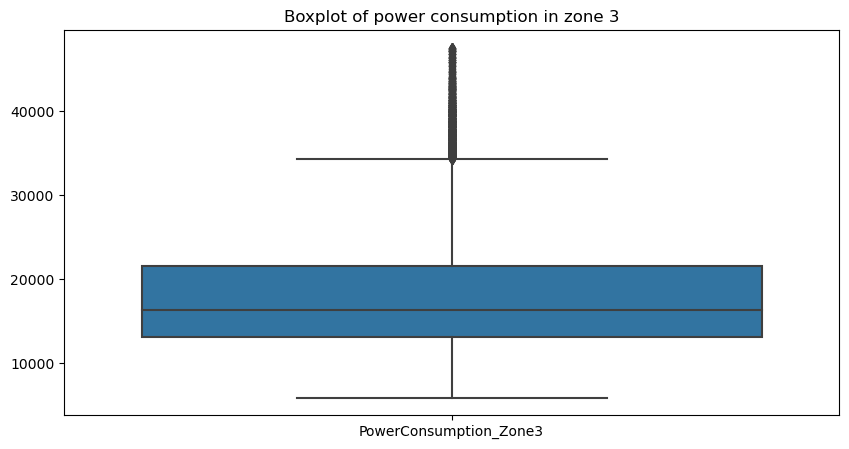

In [52]:
#checking for outliers using boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df1[['PowerConsumption_Zone3']])
plt.title('Boxplot of power consumption in zone 3')
plt.show()


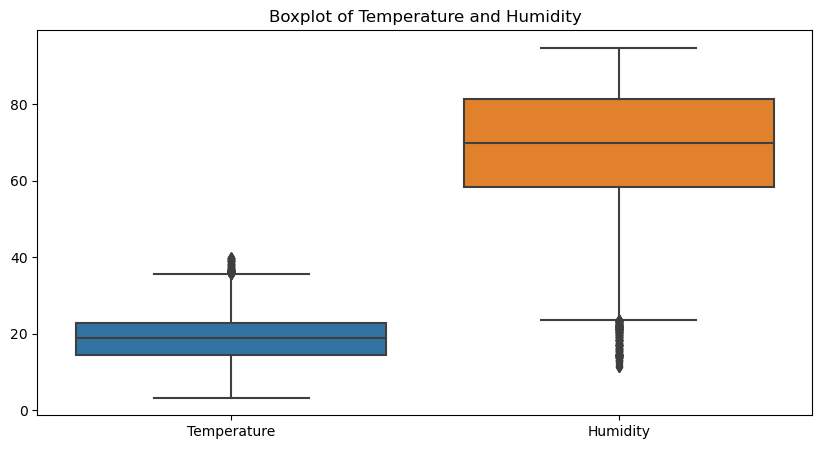

In [53]:
#checking for outliers using boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df1[['Temperature','Humidity']])
plt.title('Boxplot of Temperature and Humidity')
plt.show()


In [54]:
# Convert 'Datetime' column to datetime type
df1['Datetime'] = pd.to_datetime(df1['Datetime'])


# Extract components
df1['year'] = df1['Datetime'].dt.year
df1['month'] = df1['Datetime'].dt.month
df1['day'] = df1['Datetime'].dt.day
df1['hour'] = df1['Datetime'].dt.hour
df1['minute'] = df1['Datetime'].dt.minute
df1['second'] = df1['Datetime'].dt.second
df1['weekday'] = df1['Datetime'].dt.weekday  

# Drop the original datetime column
df1 = df1.drop(columns=['Datetime'])

# Handle missing values by filling with mean values
df1.fillna(df1.mean(), inplace=True)

# Display the first few rows of the preprocessed dataset
df1.head()


,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,PowerConsumption_Zone3,year,month,day,hour,minute,second,weekday
0,6.559,73.8,0.083,0.051,20240.96386,2017,1,1,0,0,0,6
1,6.414,74.5,0.083,0.070,20131.08434,2017,1,1,0,10,0,6
2,6.313,74.5,0.080,0.062,19668.43373,2017,1,1,0,20,0,6
3,6.121,75.0,0.083,0.091,18899.27711,2017,1,1,0,30,0,6
4,5.921,75.7,0.081,0.048,18442.40964,2017,1,1,0,40,0,6


In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             52416 non-null  float64
 1   Humidity                52416 non-null  float64
 2   WindSpeed               52416 non-null  float64
 3   GeneralDiffuseFlows     52416 non-null  float64
 4   PowerConsumption_Zone3  52416 non-null  float64
 5   year                    52416 non-null  int32  
 6   month                   52416 non-null  int32  
 7   day                     52416 non-null  int32  
 8   hour                    52416 non-null  int32  
 9   minute                  52416 non-null  int32  
 10  second                  52416 non-null  int32  
 11  weekday                 52416 non-null  int32  
dtypes: float64(5), int32(7)
memory usage: 3.4 MB


key findings: There is no missing values and duplicates.There is one categorical variable and the dataset also shows the presence of outliers.

#Exploratory data analysis

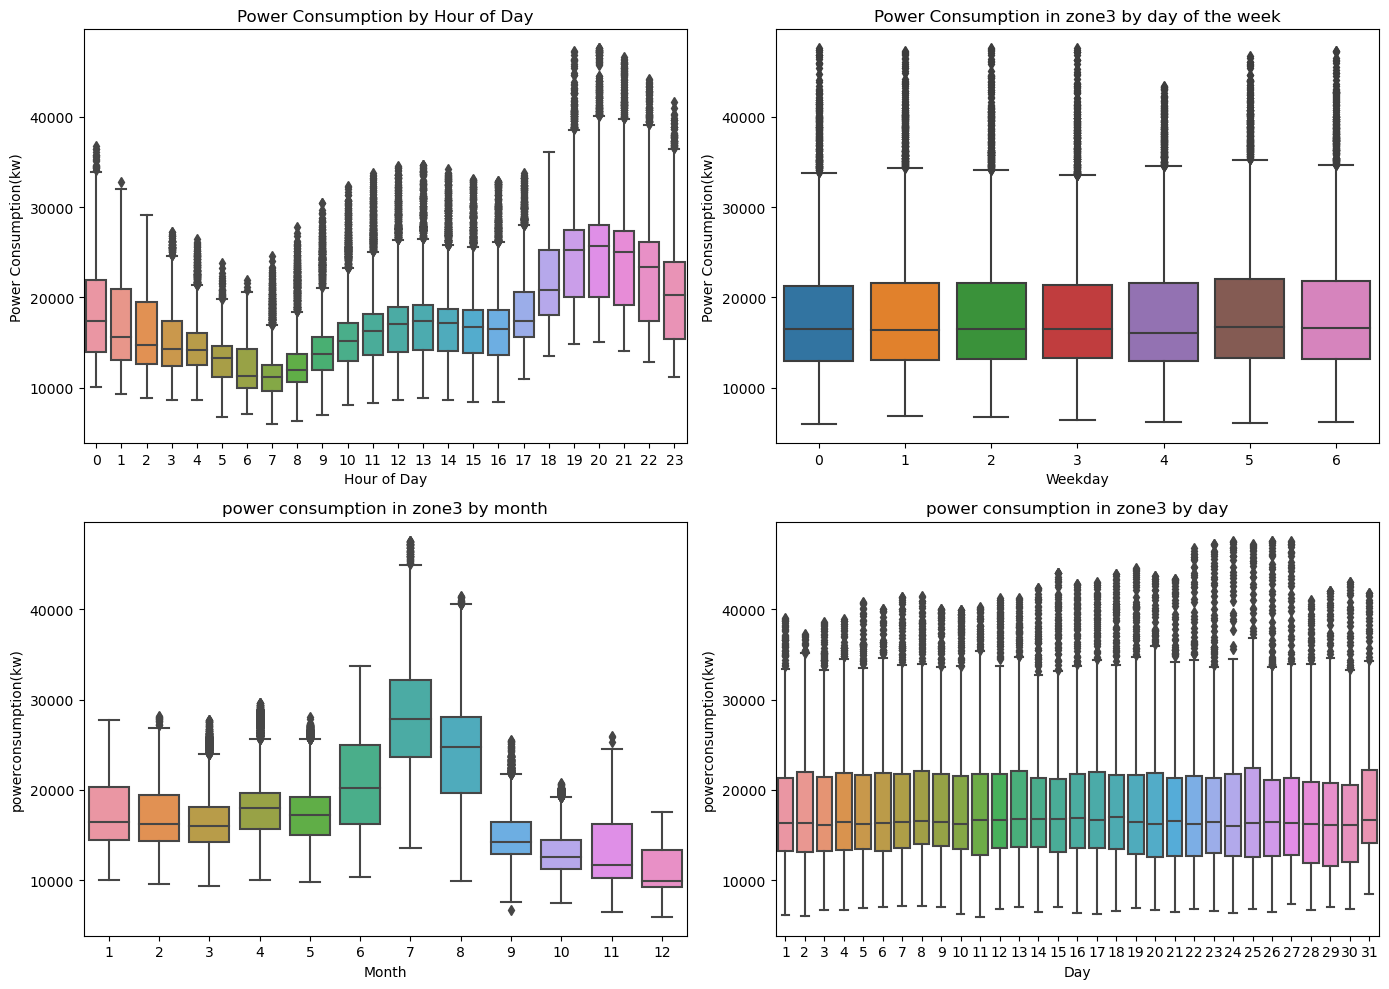

In [56]:
#Examine relationship between variables
#create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

#power consumption by hour of Day
sns.boxplot(x='hour',y='PowerConsumption_Zone3',data=df1,ax=axes[0,0])
axes[0,0].set_title('Power Consumption by Hour of Day')
axes[0,0].set_xlabel('Hour of Day')
axes[0,0].set_ylabel('Power Consumption(kw)')

#power consumption by Day of week
sns.boxplot(x ='weekday', y ='PowerConsumption_Zone3', data = df1,ax=axes[0,1])
axes[0,1].set_title('Power Consumption in zone3 by day of the week')
axes[0,1].set_xlabel('Weekday')
axes[0,1].set_ylabel('Power Consumption(kw)')

#power consumption by month
sns.boxplot(x='month',y='PowerConsumption_Zone3',data=df1,ax=axes[1,0])
axes[1,0].set_title('power consumption in zone3 by month')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('powerconsumption(kw)')

#power consumption by Day
sns.boxplot(x='day',y='PowerConsumption_Zone3',data=df1,ax=axes[1,1])
axes[1,1].set_title('power consumption in zone3 by day')
axes[1,1].set_xlabel('Day')
axes[1,1].set_ylabel('powerconsumption(kw)')

#Adjust Layout
plt.tight_layout()

#show plot
plt.show()



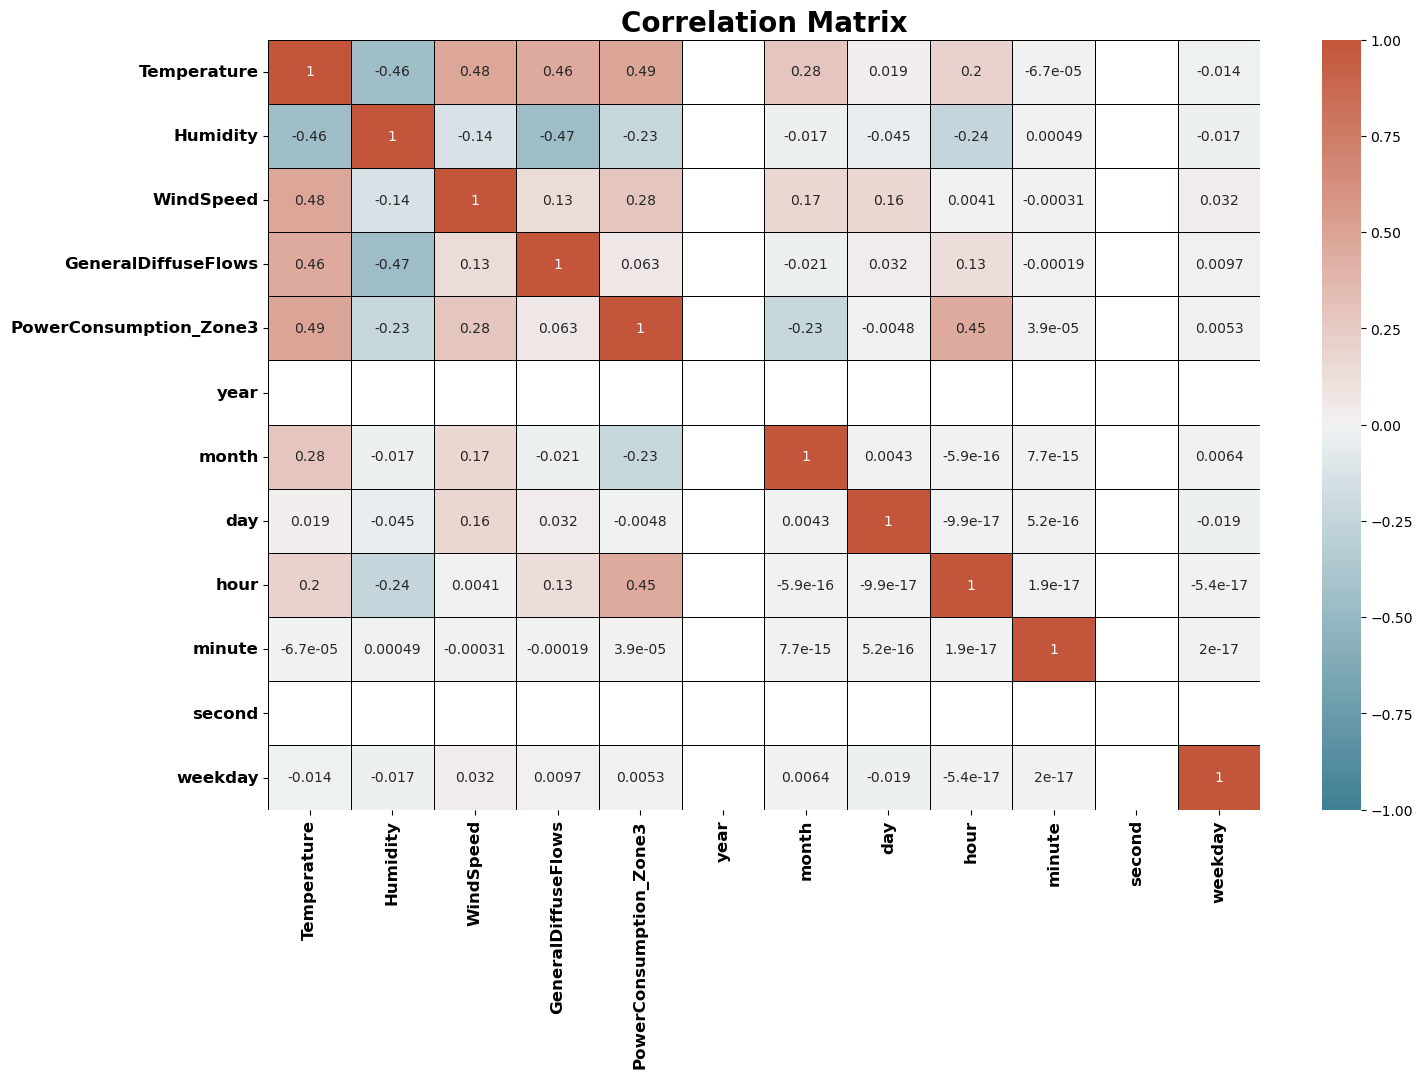

In [57]:
#correlation matrix
corr_matrix = df1.corr()
#plot correlation matrix
plt.figure(figsize=(16,10))

#create custom color map
cmap = sns.diverging_palette(220,20,as_cmap=True)

#plot heatmap
sns.heatmap(corr_matrix,annot=True,cmap=cmap,vmax=1.0,vmin=-1.0,center=0,linewidths=0.5,linecolor='black' )

#Title and labels
plt.title('Correlation Matrix',fontsize=20,fontweight='bold')
plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')


#show plot
plt.show()

key findings:power consumption is high during late night.It also shows that power consumption is high during the month july and day 25 th of the month.
correlation between features were also analyzed.

#Machine learning model development

In [58]:
# Define features and target variable
X = df1.drop(columns=['PowerConsumption_Zone3'])
y = df1['PowerConsumption_Zone3']


In [59]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [61]:
#Hyperparameter tuning with Randomizedsearchcv
#Define parameter distribution for random forest
rf_param_distributions = {
    'n_estimators': randint(50,200),
    'max_depth': [None] + list(range(10,31,10)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

#Randomized search for random forest
rf_random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state = 42), 
    param_distributions=rf_param_distributions,
    n_iter=10,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1, #use all available cores
    scoring='neg_mean_absolute_error'

)

#Fit the Randomized search on the training data for random forest
print('Fitting Rndom Forest with Randomized search..')
rf_random_search.fit(X_train_scaled, y_train)
print(f"Best parameters for Random forest:{rf_random_search.best_params_}") 



Fitting Rndom Forest with Randomized search..
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random forest:{'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 107}


1.Linear Regression

In [63]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Linear Regression model
# Instantiate the model first
model2 = LinearRegression()
model2.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model2.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 3341.915981453526
Mean Squared Error (MSE): 17896552.770336818
Root Mean Squared Error (RMSE): 4230.431747509563
R-squared (R2): 0.5895711885716064


#2.Random Forest Regressor

In [64]:
#Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest Regressor model
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model1.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model1.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 280.7122461424809
Mean Squared Error (MSE): 188777.11240402187
Root Mean Squared Error (RMSE): 434.4848816748655
R-squared (R2): 0.9956706988846876


#3.Gradient Boosting Regressor

In [65]:
# Define the Gradient Boosting model with specified parameters
gb_model = GradientBoostingRegressor(
    max_depth=17,
    max_features='log2',
    min_samples_leaf=8,
    min_samples_split=8,
    n_estimators=221,
    learning_rate=0.1,  # Adjust this value as needed
    subsample=1.0,      # Adjust this value as needed
    random_state=42
)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f' Mean Squared Error: {mse}')
print(f' Mean absolute Error: {mae}')
print(f"R-squared (R2): {r2}")

Root Mean Squared Error: 469.1462151282347
 Mean Squared Error: 220098.17116914788
 Mean absolute Error: 312.664993925247
R-squared (R2): 0.9949524005013834


In [28]:
#cross validation score of Gradient boosting regressor

gb_model = GradientBoostingRegressor(random_state = 43)
k = 100

# Use the full training set y_min instead of the test set y_min_test
cv_scores = cross_val_score(gb_model, X, y, cv=k)

print(f"Cross-Validation Scores (K={k}): {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")

Cross-Validation Scores (K=100): [ 0.91005386  0.92567579  0.92108933  0.91400478  0.89873808  0.92543106
  0.92459134  0.9505634   0.92068266  0.9342768   0.94732205  0.94509509
  0.95524646  0.92274703  0.93004585  0.94398309  0.93579971  0.94038025
  0.94057966  0.93865849  0.94356966  0.90507087  0.91254466  0.91091646
  0.88604053  0.88525979  0.87346171  0.92336993  0.84788461  0.93247555
  0.91581992  0.93265677  0.92045647  0.74195989  0.93077501  0.89487662
  0.68371842  0.89087595  0.86181876  0.89419612  0.78617032  0.82199919
  0.84743499  0.80418206  0.81443945  0.79473144  0.78002645  0.65044435
  0.66654748  0.76192363  0.88013391  0.84473706  0.9229409   0.90585912
  0.8162856   0.85132382  0.66903097  0.86625903  0.89216094  0.91933951
  0.89177734  0.8859348   0.90741846  0.77548393  0.86537981  0.56555537
 -1.40924442  0.58052266  0.79038797  0.70638913  0.7946305   0.81938063
  0.36727983  0.92729212  0.6364296   0.5970963   0.86549701  0.89163784
  0.90892414  0.84

In [34]:
#Cross validation score of Random forest regressor

model1 = RandomForestRegressor(random_state = 43)
k = 100

# Use the full training set y_min instead of the test set y_min_test
cv_scores = cross_val_score(model1, X, y, cv=k)

print(f"Cross-Validation Scores (K={k}): {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")

Cross-Validation Scores (K=100): [ 0.98436568  0.99455613  0.99026121  0.98120325  0.96438469  0.98014643
  0.97633522  0.98381338  0.97876379  0.98038154  0.97991391  0.97854939
  0.98704743  0.95499085  0.95597067  0.98176007  0.98176237  0.98266681
  0.9852442   0.95028889  0.97756088  0.92887673  0.97509398  0.96270602
  0.95390727  0.98562249  0.97089488  0.97516049  0.96631933  0.98454443
  0.97443625  0.96640688  0.86015459  0.94484056  0.97802328  0.97612733
  0.97143067  0.98671126  0.96398765  0.95178431  0.80301085  0.96443642
  0.98958729  0.97427565  0.98659224  0.9656885   0.94070432  0.88221717
  0.85390804  0.93943099  0.9657544   0.91649264  0.95192337  0.97043366
  0.86094611  0.94159556  0.83931064  0.63323228  0.91773386  0.94779852
  0.94995532  0.95793979  0.97161622  0.92362784  0.79398634  0.56647403
 -0.53181358  0.79783252  0.94183197  0.65371062  0.88911156  0.89153852
  0.90124564  0.88287618  0.7119066   0.90671184  0.9460939   0.94997607
  0.93554177  0.87

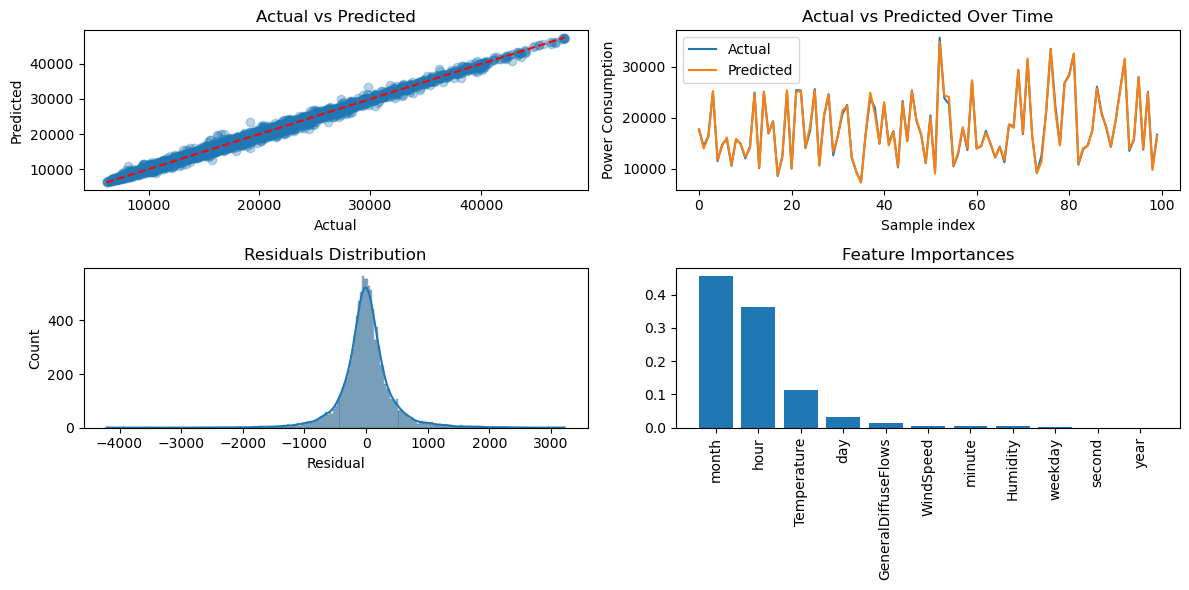

In [66]:
#Visualization
plt.figure(figsize=(12, 6))

# Scatter plot: Actual vs Predicted
plt.subplot(2, 2, 1)

# Fit the Random Forest Regressor model
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model1.fit(X_train_scaled, y_train)


def rf_pred(X):
    return model1.predict(X)
# Assuming you want to use predictions from the Random forest regressorRegressor:
y_pred_test = rf_pred(X_test_scaled)
plt.scatter(y_test, y_pred_test, alpha=0.3)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Line plot: Actual vs Predicted
plt.subplot(2, 2, 2)
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred_test[:100], label='Predicted')
plt.xlabel('Sample index')
plt.ylabel('Power Consumption')
plt.title('Actual vs Predicted Over Time')
plt.legend()

# Residual plot
plt.subplot(2, 2, 3)
residuals = y_test - y_pred_test
sns.histplot(residuals, kde=True)
plt.xlabel('Residual')
plt.title('Residuals Distribution')

# Feature Importance
plt.subplot(2, 2, 4)
# Replace 'best_rf' with the correct variable name for your Random Forest model
importances = rf_model.feature_importances_  # Assuming 'rf_model' is your Random Forest model
indices = np.argsort(importances)[::-1]
plt.bar(range(len(indices)), importances[indices], align='center')
# Get feature names from the original DataFrame 'X'
features = X.columns 
plt.xticks(range(len(indices)), [features[i] for i in indices], rotation=90)
plt.title('Feature Importances')



plt.tight_layout()
plt.show()

Interpretation: Random Forest regressor is the best model for predicting power consumption in zone 3 with R^2 score of 0.99 and MAE of 280.


It also shows Mean accuracy of 0.91 with standard deviation of 0.17